In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway
from scipy.stats import kruskal


In [ ]:
df=pd.read_csv('/content/sustainable_fashion_trends_2024.csv')
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [ ]:
df.tail()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
4995,BRAND-4996,Brand_4996,Brazil,2010,A,Organic Cotton,Yes,423.73,251736.61,50532.28,No,1,490.95,Stable,NaN
4996,BRAND-4997,Brand_4997,Germany,2012,C,Bamboo Fabric,Yes,68.24,2342347.78,64214.57,Yes,13,53.92,Stable,Fair Trade
4997,BRAND-4998,Brand_4998,Japan,2023,D,Vegan Leather,Yes,321.12,317800.67,81467.21,Yes,12,431.32,Stable,NaN
4998,BRAND-4999,Brand_4999,India,2016,A,Tencel,No,124.83,927539.68,34506.22,Yes,20,322.95,Declining,Fair Trade
4999,BRAND-5000,Brand_5000,Italy,2016,B,Vegan Leather,No,192.11,3402552.70,81958.82,Yes,11,205.62,Growing,NaN


In [ ]:
df.shape

(5000, 15)

In [ ]:
df.dtypes

,0
Brand_ID,object
Brand_Name,object
Country,object
Year,int64
Sustainability_Rating,object
Material_Type,object
Eco_Friendly_Manufacturing,object
Carbon_Footprint_MT,float64
Water_Usage_Liters,float64
Waste_Production_KG,float64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


In [ ]:
df.isnull().sum()

,0
Brand_ID,0
Brand_Name,0
Country,0
Year,0
Sustainability_Rating,0
Material_Type,0
Eco_Friendly_Manufacturing,0
Carbon_Footprint_MT,0
Water_Usage_Liters,0
Waste_Production_KG,0


In [ ]:
df = df.dropna(subset=['Certifications'])

In [ ]:
df.isnull().sum()

,0
Brand_ID,0
Brand_Name,0
Country,0
Year,0
Sustainability_Rating,0
Material_Type,0
Eco_Friendly_Manufacturing,0
Carbon_Footprint_MT,0
Water_Usage_Liters,0
Waste_Production_KG,0


In [ ]:
df.shape

(3996, 15)

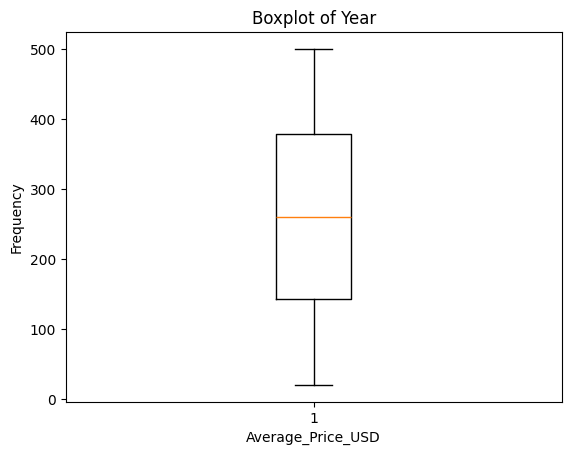

In [ ]:
plt.boxplot(df['Average_Price_USD'])
plt.title('Boxplot of Year')
plt.xlabel('Average_Price_USD')
plt.ylabel('Frequency')
plt.show()

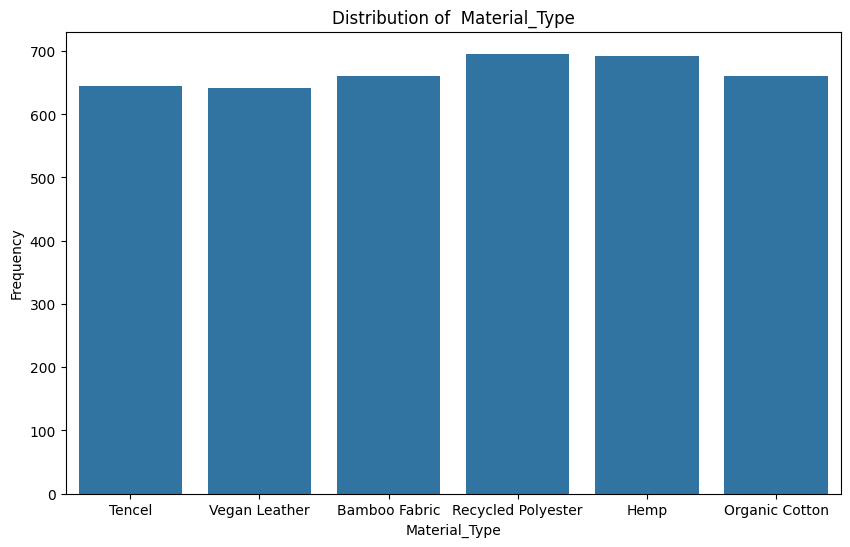

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Material_Type')
plt.title('Distribution of  Material_Type')
plt.xlabel('Material_Type')
plt.ylabel('Frequency')
plt.show()

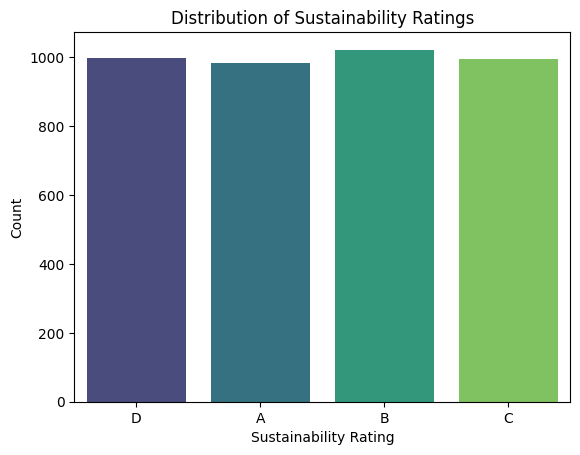

In [ ]:
sns.countplot(x='Sustainability_Rating', data=df, hue='Sustainability_Rating', palette='viridis', legend=False)
plt.title('Distribution of Sustainability Ratings')
plt.xlabel('Sustainability Rating')
plt.ylabel('Count')
plt.show()

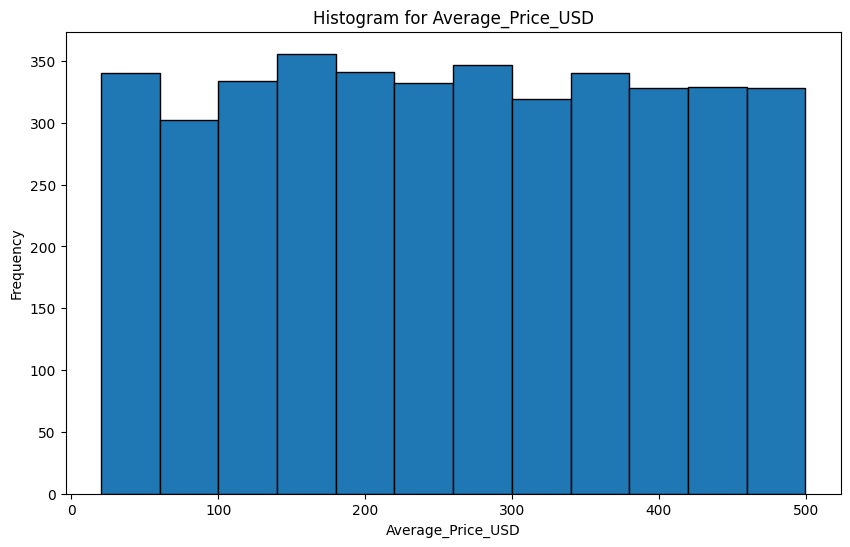

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data=df, x='Average_Price_USD', bins=12,edgecolor='black')
plt.title('Histogram for Average_Price_USD')
plt.xlabel('Average_Price_USD')
plt.ylabel('Frequency')
plt.show()

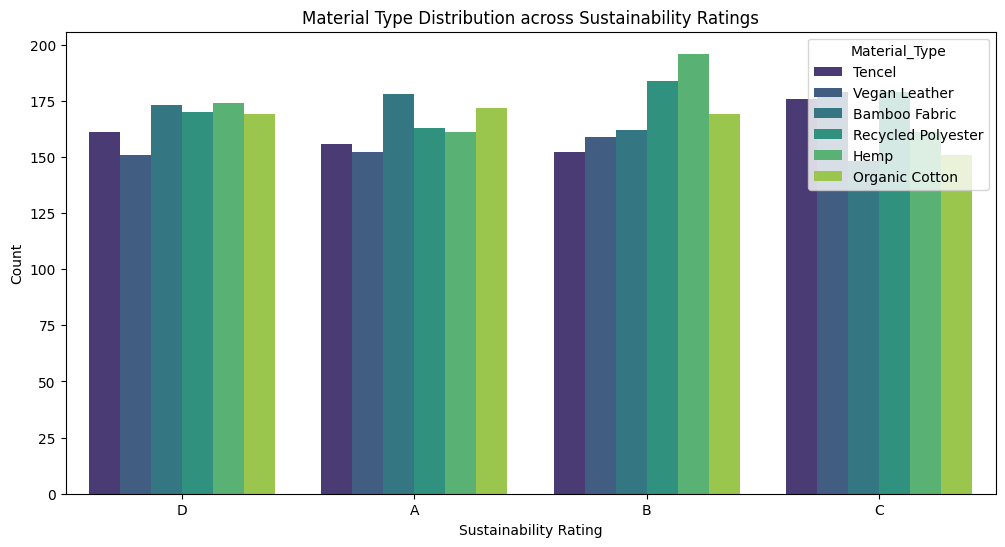

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Sustainability_Rating", hue="Material_Type", palette="viridis")
plt.title("Material Type Distribution across Sustainability Ratings")
plt.xlabel("Sustainability Rating")
plt.ylabel("Count")

plt.show()

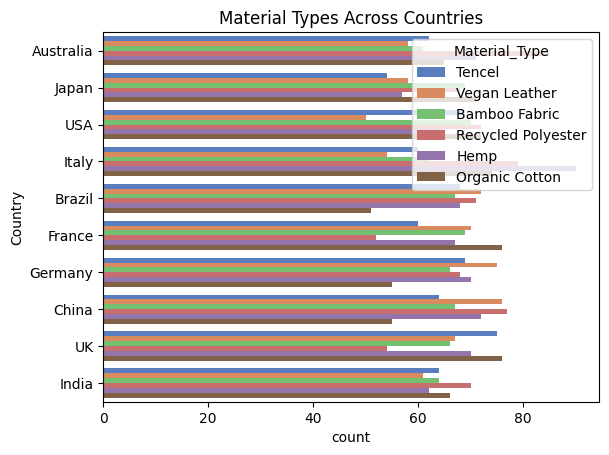

In [ ]:
sns.countplot(y='Country', hue='Material_Type', data=df, palette='muted')
plt.title('Material Types Across Countries')
plt.show()

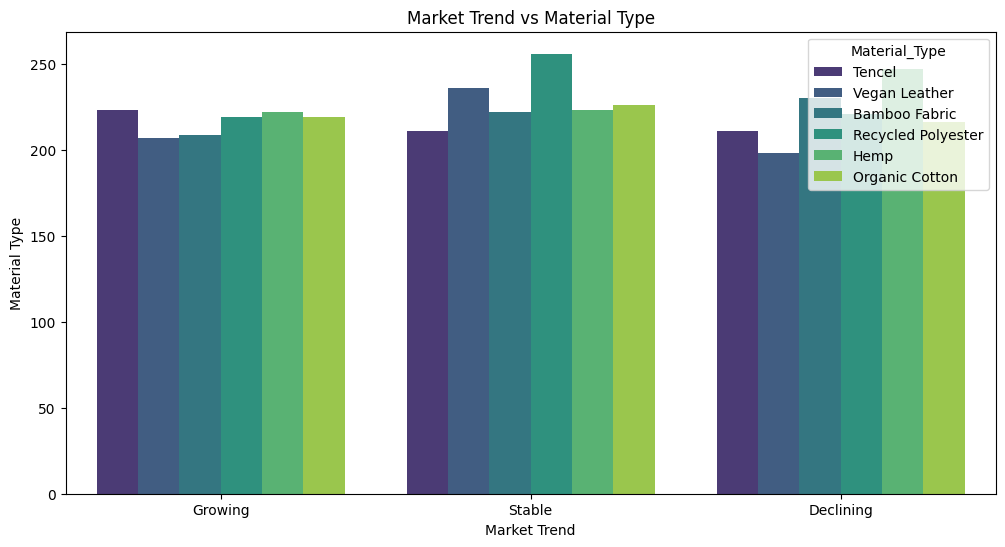

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Market_Trend', hue='Material_Type', palette='viridis')
plt.title('Market Trend vs Material Type')
plt.xlabel('Market Trend')
plt.ylabel('Material Type')
plt.show()

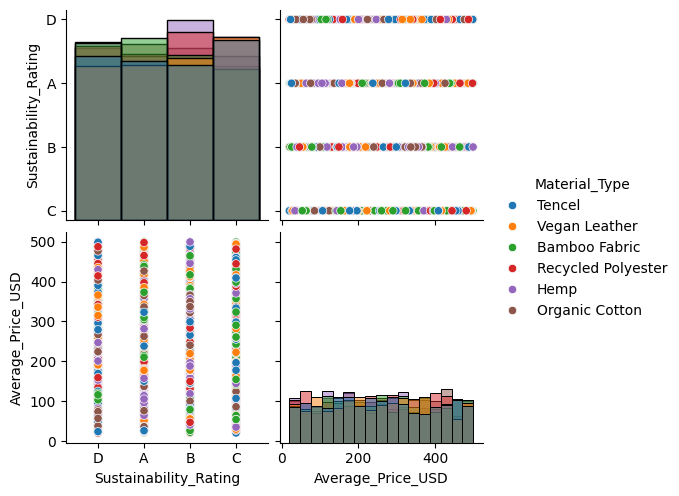

In [ ]:
sns.pairplot(df, hue='Material_Type', vars=['Sustainability_Rating', 'Average_Price_USD'], diag_kind='hist')
plt.show()

Statistics


Two sample independent ttest-

In [ ]:
df['Material_Type'].value_counts()

,count
Material_Type,
Recycled Polyester,696
Hemp,692
Bamboo Fabric,661
Organic Cotton,661
Tencel,645
Vegan Leather,641


In [ ]:
df.groupby('Material_Type')['Average_Price_USD'].mean()

,Average_Price_USD
Material_Type,
Bamboo Fabric,261.118517
Hemp,260.063280
Organic Cotton,260.050106
Recycled Polyester,262.006667
Tencel,256.288791
Vegan Leather,258.713526


In [ ]:
Recycled_Polyester=df[df['Material_Type']=='Recycled Polyester']['Average_Price_USD']
Recycle_sample=np.random.choice(Recycled_Polyester,600)


In [ ]:
Tencel=df[df['Material_Type']=='Tencel']['Average_Price_USD']
Tencel_sample=np.random.choice(Tencel,600)

In [ ]:
Recycle_sample.mean()

262.67345

In [ ]:
Tencel_sample.mean()

253.31248333333332

In [ ]:
_,p_value=shapiro(Recycle_sample)
if p_value>0.05:
  _,p_value=shapiro(Tencel_sample)
  if p_value>0.05:
    print('Fail to reject the null Hypothesis')
  else:
    print('Reject the null Hypothesis Tencel_sample ')
else:
  print('Reject the null Hypothesis Recycle_sample')



Reject the null Hypothesis Recycle_sample


In [ ]:
_,p_value=levene(Recycle_sample,Tencel_sample)
if p_value>0.05:
  print('Fail to reject the null Hypothesis')
else:
  print('Reject the null Hypothesis')

Fail to reject the null Hypothesis


In [ ]:
_,p_value=ttest_ind(Recycle_sample,Tencel_sample,equal_var=True)
if p_value>0.05:
  print('Fail to reject the null Hypothesis')
else:
  print('Reject the null Hypothesis')

Fail to reject the null Hypothesis


In [ ]:
_,p_value=mannwhitneyu(Recycle_sample,Tencel_sample)
if p_value>0.05:
  print('Fail to reject the null Hypothesis')
else:
  print('Reject the null Hypothesis')

Fail to reject the null Hypothesis


One way Annova

In [ ]:
df['Sustainability_Rating'].value_counts()

,count
Sustainability_Rating,
B,1022
D,998
C,994
A,982


In [ ]:
A=df[df['Sustainability_Rating']=='A']['Average_Price_USD']
B=df[df['Sustainability_Rating']=='B']['Average_Price_USD']
C=df[df['Sustainability_Rating']=='C']['Average_Price_USD']
D=df[df['Sustainability_Rating']=='D']['Average_Price_USD']

In [ ]:
A.mean(),B.mean(),C.mean(),D.mean()

(256.19396130346234, 262.0312035225049, 257.6622434607646, 262.985871743487)

In [ ]:
_,p_value=shapiro(A)
if p_value>0.05:
  _,p_value=shapiro(B)
  if p_value>0.05:
    _,p_value=shapiro(C)
    if p_value>0.05:
      _,p_value=shapiro(D)
      if p_value>0.05:
        print('Fail to reject the null Hypothesis')
      else:
        print('Reject the null Hypothesis D')
    else:
      print('Reject the null Hypothesis C')
  else:
    print('Reject the null Hypothesis B')
else:
  print('Reject the null Hypothesis A')

Reject the null Hypothesis A


In [ ]:
_,p_value=levene(A,B,C,D)
if p_value>0.05:
  print('Fail to reject the null Hypothesis')
else:
  print('Reject the null Hypothesis')

Fail to reject the null Hypothesis


In [ ]:
_,p_value=f_oneway(A,B,C,D)
if p_value>0.05:
  print('Fail to reject the null Hypothesis')
else:
  print('Reject the null Hypothesis')

Fail to reject the null Hypothesis


In [ ]:
_,p_value=kruskal(A,B,C,D)
if p_value>0.05:
  print('Fail to reject the null Hypothesis')
else:
  print('Reject the null Hypothesis')

Fail to reject the null Hypothesis
